In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a consistent style for plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})

In [3]:
# Load the data
df = pd.read_csv("Crop_recommendation.csv")

# Initial Data Exploration
print("Dataset Information:")
print(df.info(), "\n")
print("Dataset Summary Statistics:")
print(df.describe(), "\n")
print("Missing Values in Dataset:", df.isnull().sum().sum())

# Feature Selection
data = df[['temperature', 'humidity']]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None 

Dataset Summary Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675 

In [4]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:", outliers[column].values)
    return outliers.index

# Detect and remove outliers for Temperature
temp_outliers = detect_outliers_iqr(data, 'temperature')
data_cleaned = data.drop(index=temp_outliers)

# Detect and remove outliers for Humidity in the cleaned data
humidity_outliers = detect_outliers_iqr(data_cleaned, 'humidity')
data_cleaned = data_cleaned.drop(index=humidity_outliers)

print(f"Data shape before removing outliers: {data.shape}")
print(f"Data shape after removing outliers: {data_cleaned.shape}")

Outliers in temperature: [37.46566825 39.64851881 12.14190714 12.7567962  39.04071989 39.70772192
  9.46796044  8.82567475 11.02105378 12.087022   12.80000387 38.06099482
 39.06555518 10.89875873 11.7976469  11.36300891 41.18664903 10.38004759
 10.72302459 41.20733624 40.66012294 11.82768186 13.28504331 39.37102553
 41.65602996 41.36106301 41.94865736 11.18994268 13.05809741  9.72445761
  9.53558554 13.42988625  9.85124263  9.94992908 13.36050601 11.50322938
 12.22816189 10.01081312 10.78689755 11.89925671 13.8377282  11.54785707
 13.70319166 13.20844373 12.59093977 11.86631922 11.03367937 10.2708877
 10.35609594 10.16431299 11.69894639 42.39413392 38.4191628  42.92325255
 40.21199348 42.13473976 38.4418717  39.01793345 38.72382798 43.30204933
 40.78881819 39.30050027 39.73149053 39.23342464 40.76998685 42.30495821
 42.84609252 43.67549305 42.07213781 41.41968393 42.54744013 43.08022702
 41.04224355 42.93368602 43.36051537 43.03714283 37.4620912  38.73218907
 38.38231475 42.93605359 37

In [5]:
# Plot histograms and boxplots of cleaned data
x_cleaned = data_cleaned["temperature"]
y_cleaned = data_cleaned["humidity"]

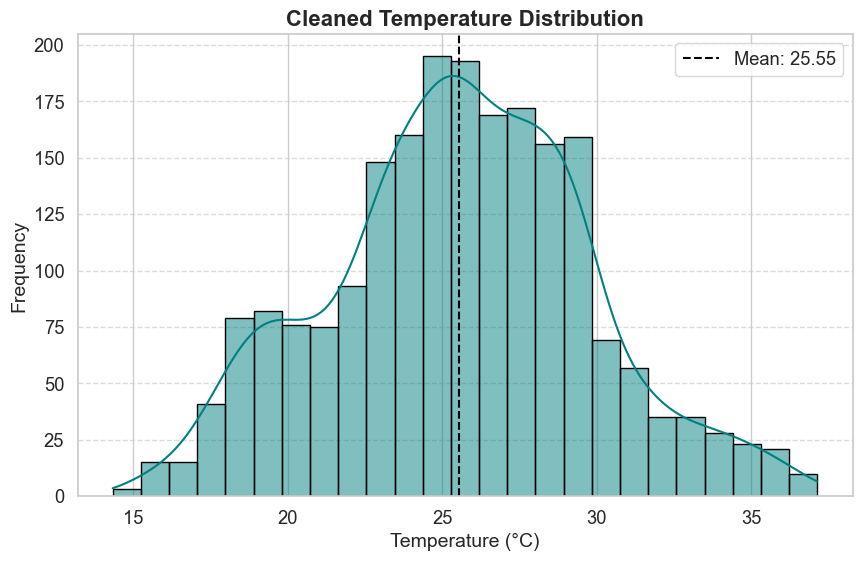

In [6]:
# Histogram of Cleaned Temperature
plt.figure(figsize=(10, 6))
sns.histplot(x_cleaned, bins=25, color='teal', kde=True, edgecolor='black')
plt.title('Cleaned Temperature Distribution', fontsize=16, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate skewness and mean
plt.axvline(x_cleaned.mean(), color='black', linestyle='--', label=f'Mean: {x_cleaned.mean():.2f}')
plt.legend()
plt.show()

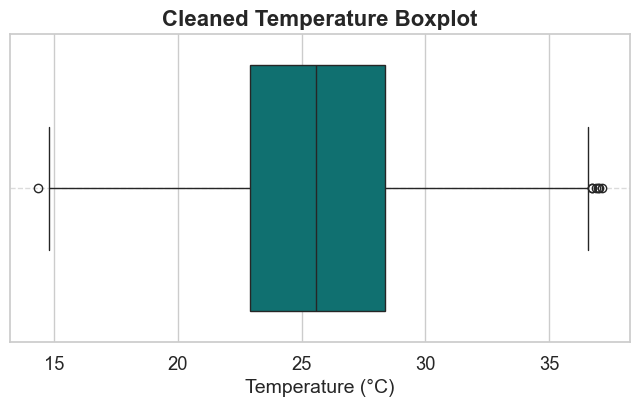

In [7]:
# Boxplot of Cleaned Temperature
plt.figure(figsize=(8, 4))
sns.boxplot(x=x_cleaned, color='teal')
plt.title('Cleaned Temperature Boxplot', fontsize=16, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

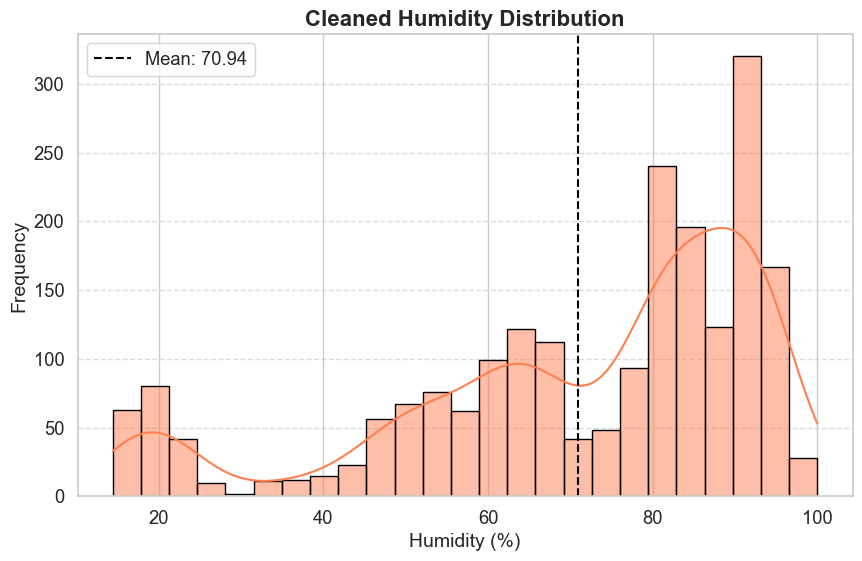

In [8]:
# Histogram of Cleaned Humidity
plt.figure(figsize=(10, 6))
sns.histplot(y_cleaned, bins=25, color='coral', kde=True, edgecolor='black')
plt.title('Cleaned Humidity Distribution', fontsize=16, weight='bold')
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate skewness and mean
plt.axvline(y_cleaned.mean(), color='black', linestyle='--', label=f'Mean: {y_cleaned.mean():.2f}')
plt.legend()
plt.show()

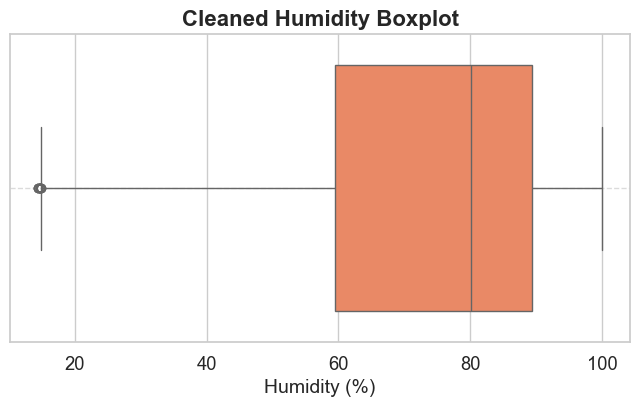

In [9]:
# Boxplot of Cleaned Humidity
plt.figure(figsize=(8, 4))
sns.boxplot(x=y_cleaned, color='coral')
plt.title('Cleaned Humidity Boxplot', fontsize=16, weight='bold')
plt.xlabel('Humidity (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

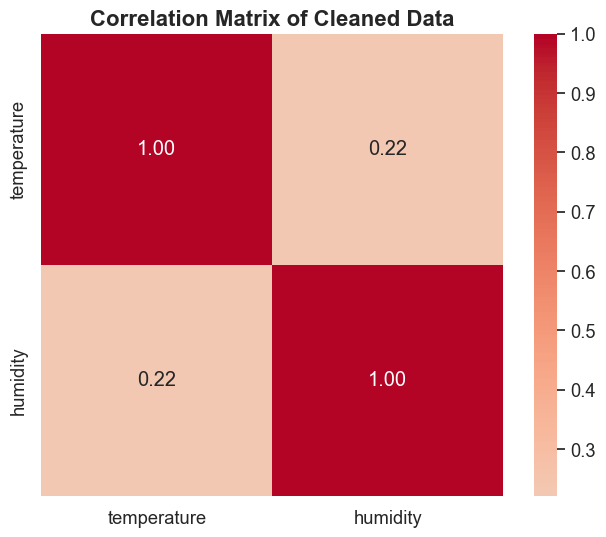

Correlation between Temperature and Humidity in Cleaned Data:
             temperature  humidity
temperature     1.000000  0.221372
humidity        0.221372  1.000000


In [13]:
# Correlation Analysis on Cleaned Data
correlation = data_cleaned.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title("Correlation Matrix of Cleaned Data", fontsize=16, weight='bold')
plt.show()

# Display cleaned correlation
print("Correlation between Temperature and Humidity in Cleaned Data:")
print(correlation)

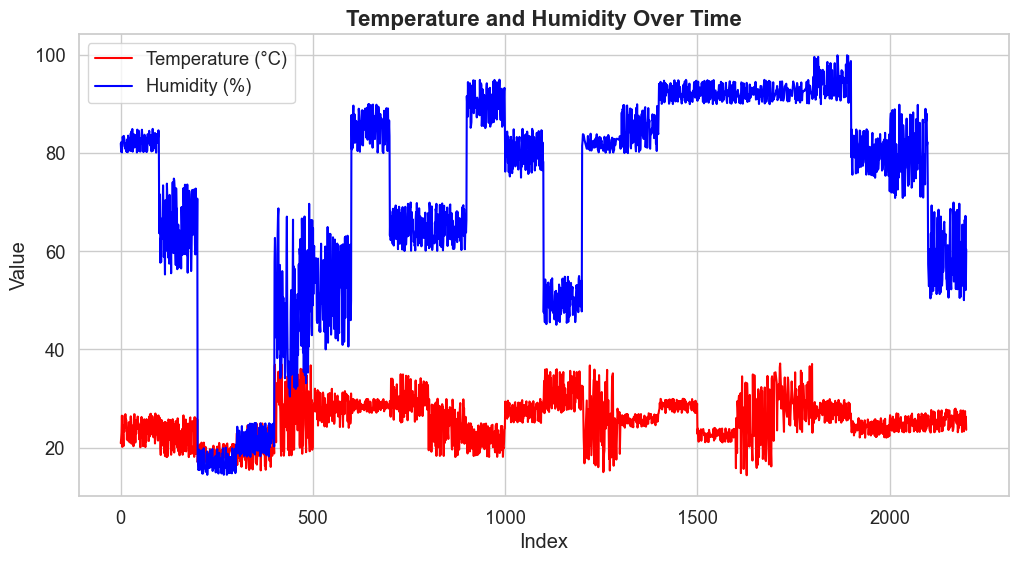

In [11]:
# Define x and y from the cleaned dataset
x_cleaned = data_cleaned["temperature"]
y_cleaned = data_cleaned["humidity"]

# Line plots for Temperature and Humidity
plt.figure(figsize=(12, 6))
sns.lineplot(data=x_cleaned, color="red", label="Temperature (°C)")
sns.lineplot(data=y_cleaned, color="blue", label="Humidity (%)")
plt.title("Temperature and Humidity Over Time", fontsize=16, weight='bold')
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()